Load Dataset
Data Pre-processing
Feature Scaling
Split Data
Train Data

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [49]:
#Load Dataset
file_path = '/content/train.csv'
data = pd.read_csv(file_path)

In [50]:
#Data preprocessing

data.dropna(inplace=True)
X = data.drop('cardio', axis=1)
y = data['cardio']

In [53]:
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


In [52]:
#Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

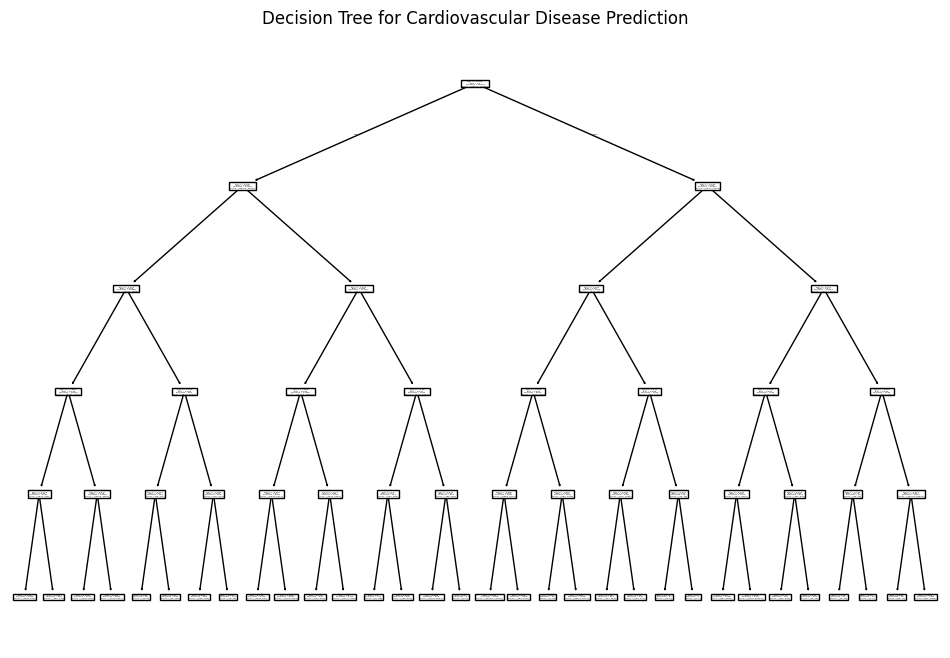

Mean CV Accuracy: 0.7313
Mean CV Precision: 0.7612
Mean CV Recall: 0.6738
Mean CV F1-Score: 0.7148

Confusion Matrix (Aggregated from CV Predictions):
[[22421  5596]
 [ 9416 18567]]

Classification Report (Aggregated from CV Predictions):
              precision    recall  f1-score   support

           0       0.70      0.80      0.75     28017
           1       0.77      0.66      0.71     27983

    accuracy                           0.73     56000
   macro avg       0.74      0.73      0.73     56000
weighted avg       0.74      0.73      0.73     56000



In [56]:
# Create Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# Perform 5-Fold Cross-Validation directly on X_Scaled and y
cv_scores = cross_val_score(clf, X_scaled, y, cv=5, scoring='accuracy')

# Define stratified 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross-Validation for Different Metrics
cv_accuracy = cross_val_score(clf, X_scaled, y, cv=cv, scoring='accuracy')
cv_precision = cross_val_score(clf, X_scaled, y, cv=cv, scoring='precision')
cv_recall = cross_val_score(clf, X_scaled, y, cv=cv, scoring='recall')
cv_f1 = cross_val_score(clf, X_scaled, y, cv=cv, scoring='f1')

# Perform cross-validation predictions to get confusion matrix
y_pred_cv = cross_val_predict(clf, X_scaled, y)

# Compute confusion matrix for Cross-Validation
conf_matrix_cv = confusion_matrix(y, y_pred_cv)


# # Predict on Test Data (Unseen Data)
# y_pred_test = clf.predict(X_test)

# # Compute Confusion Matrix for Test Data
# conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Train the Decision Tree
clf.fit(X_scaled, y)

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf)
plt.title("Decision Tree for Cardiovascular Disease Prediction")
plt.show()

# Print Cross-Validation Results (Training Data)
print(f"Mean CV Accuracy: {np.mean(cv_accuracy):.4f}")
print(f"Mean CV Precision: {np.mean(cv_precision):.4f}")
print(f"Mean CV Recall: {np.mean(cv_recall):.4f}")
print(f"Mean CV F1-Score: {np.mean(cv_f1):.4f}")

# Display Confusion Matrix (Cross-Validation on Training Data)
print("\nConfusion Matrix (Aggregated from CV Predictions):")
print(conf_matrix_cv)


# Display Full Classification Report
print("\nClassification Report (Aggregated from CV Predictions):")
print(classification_report(y, y_pred_cv))

# # Display Confusion Matrix (Test Data)
# print("\nConfusion Matrix (On Test Data):")
# print(conf_matrix_test)

# # Display Classification Report (Test Data)
# print("\nClassification Report (On Test Data):")
# print(classification_report(y_test, y_pred_test))